In [24]:
import importlib
from pymongo import MongoClient
from datetime import datetime, timedelta
import sys
sys.path.append("/Users/rebecca.ndubuisi/workspace/mongodb-eduhub-project/src")
import eduhub_queries
from pprint import pprint
importlib.reload(eduhub_queries)
from eduhub_queries import *
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
client = MongoClient("mongodb://localhost:27017/")
db = client["eduhub_db"]


# **TASK 3**

## **Task 3.1: Create Operations**

**Inserting to the users collection**

In [42]:
new_student = {
    "_id": "user31",
    "email": "beckynd@gmail.com",
    "firstName": "Becky",
    "lastName": "Ndubuisi",
    "role": "student",
    "dateJoined": datetime.utcnow(),
    "profile": {
        "bio": "Excited to learn!",
        "avatar": "https://example.com/avatar.png",
        "skills": ["Python", "MongoDB"]
    },
    "isActive": False
}

In [43]:
insert_one('users',new_student)

✅ Inserted into 'users' with _id: user31


'user31'

**Inserting to the courses collection**

In [19]:
instructor_user = db.users.find_one({"role": "instructor"})
instructor_userId = instructor_user["_id"]

new_course = {
    "_id": "course9",
    "title": "MongoDB for Beginners",
    "description": "Learn the basics of MongoDB and NoSQL design.",
    "instructorId": instructor_userId,
    "category": "Databases",
    "level": "beginner",
    "duration": 10,  # in hours
    "price": 49.99,
    "tags": ["mongodb", "nosql", "database"],
    "createdAt": datetime.utcnow(),
    "updatedAt": datetime.utcnow(),
    "isPublished": False
}


insert_one('courses',new_course)

✅ Inserted into 'courses' with _id: course9


'course9'

**Inserting into the enrollments collection**

In [21]:
student_user = db.users.find_one({"role": "student"})
studentId = student_user["_id"]

course = db.courses.find_one()
courseId = course["_id"]

enrollment = {
    "_id": "enroll26",
    "studentId": studentId,
    "courseId": courseId,
    "enrolledAt": datetime.utcnow(),
    "status": "in progress"
}

insert_one('enrollments',enrollment)

✅ Inserted into 'enrollments' with _id: enroll26


'enroll26'

**Inserting into lessons collection**

In [22]:
course = db.courses.find_one()
courseId = course["_id"]

lesson = {
    "_id": f"lesson_{courseId}_4",
    "courseId": courseId,
    "title": "Introduction to MongoDB",
    "content": "This lesson introduces MongoDB fundamentals.",
    "duration": 10,
    "order": 4,
    "resources": ["https://docs.mongodb.com"],
    "createdAt": datetime.utcnow(),
    "updatedAt": datetime.utcnow()
}

insert_one('lessons',lesson)

✅ Inserted into 'lessons' with _id: lesson_course1_4


'lesson_course1_4'

## **Task 3.2: Read Operations**

**Find all Active Student**

In [44]:
students = find_active_students(db)
for student in students:
    print(student["firstName"], student["lastName"])

Christopher Davis
George Torres
Brittany Smith
Brenda Dominguez
Eric Hall
Jennifer Shaffer
Megan Mcdaniel
David Burton
James Mason
Lori Reed
David Simpson
Colleen Hudson
Kendra Morton
Susan Rodriguez
Raymond Erickson
Samantha Harris
Jerry Williams
Austin Delacruz
Joseph Murray
Derrick Clark
John Conner
Amanda Ramirez
Emily Peterson
Jose Smith


**Retrieve course details with instructor information**

In [46]:
courses = get_courses_with_instructors(db)
for c in courses:
    instructor = c.get("instructor", {})
    print(f"{c['title']} - {instructor.get('firstName', 'N/A')} {instructor.get('lastName', '')}")


Program Masterclass - Lisa Valdez
Politics Masterclass - Billy Green
Step Masterclass - Raymond Newman
Mr Masterclass - Rachel Miles
Star Masterclass - Billy Green
Officer Masterclass - Lisa Valdez
Art Masterclass - Frank Bowen
Condition Masterclass - Billy Green
MongoDB for Beginners - Billy Green


**Get all courses in a specific category**

In [48]:
ds_courses = get_courses_by_category(db, "Databases")
for course in ds_courses:
    print(course["title"])

MongoDB for Beginners


**Find students enrolled in a particular course**

In [68]:
course_title, students = get_students_in_course(db, "course1")
if course_title:
    for student in students:
        print(f"{student['firstName']} {student['lastName']} ({student['_id']}) - {course_title}")
else:
    print("Course not found.")


David Simpson (user11) - Program Masterclass
Susan Rodriguez (user14) - Program Masterclass
Christopher Davis (user1) - Program Masterclass


**Search courses by title (case-insensitive, partial match)**

In [70]:
matched_courses = search_courses_by_title(db, "mongodb")
for course in matched_courses:
    print(course["title"])


MongoDB for Beginners


# **Task 3.3: Update Operations**

**Update a user’s profile information**

In [76]:
profile_data = {
    "bio": "Experienced data scientist and Python developer.",
    "avatar": "http://example.com/avatar.jpg",
    "skills": ["Python", "Data Science", "MongoDB"]
}


update_document(
    db,
    "users",
    {"_id": "user12"},
    {"$set": {"profile": profile_data}}
)

db.users.find_one({'_id':"user12"})

{'_id': 'user12',
 'email': 'xharrell@example.com',
 'firstName': 'Colleen',
 'lastName': 'Hudson',
 'role': 'student',
 'dateJoined': datetime.datetime(2025, 3, 20, 12, 57, 56, 991000),
 'profile': {'bio': 'Experienced data scientist and Python developer.',
  'avatar': 'http://example.com/avatar.jpg',
  'skills': ['Python', 'Data Science', 'MongoDB']},
 'isActive': True}

**Mark a course as published**

In [83]:
update_document(
    db,
    "courses",
    {"_id": "course8"},
    {"$set": {"isPublished": True}}
)


db.courses.find_one({'_id':"course8"})

{'_id': 'course8',
 'title': 'Condition Masterclass',
 'description': 'Require perform beautiful institution imagine. Two education career discussion reflect. Yet economic other hair reach.',
 'instructorId': 'user25',
 'category': 'AI',
 'level': 'beginner',
 'duration': 49,
 'price': 115.6,
 'tags': ['body', 'east', 'time', 'where'],
 'createdAt': datetime.datetime(2025, 6, 14, 13, 9, 17, 918000),
 'updatedAt': datetime.datetime(2025, 6, 14, 13, 9, 17, 918000),
 'isPublished': True}

**Update assignment grades**

In [81]:
update_document(
    db,
    "assignments",
    {"_id": "assign_course5_2"},
    {"$set": {"grade": 95.5}}
)

db.assignments.find_one({'_id':"assign_course5_2"})

{'_id': 'assign_course5_2',
 'courseId': 'course5',
 'lessonId': None,
 'title': 'Assignment for Star Masterclass',
 'description': 'Join rate conference score only under her. Game officer of free. Building dark edge sign moment alone. Same ok husband.',
 'createdAt': datetime.datetime(2025, 6, 14, 13, 13, 36, 363000),
 'dueDate': datetime.datetime(2025, 6, 19, 13, 13, 36, 363000),
 'attachmentUrl': 'https://woodward.com/',
 'grade': 95.5}

**Add tags to an existing course**

In [82]:
update_document(
    db,
    "courses",
    {"_id": "course9"},
    {"$addToSet": {"tags": {"$each": ["shell", "python"]}}}
)

db.courses.find_one({'_id':"course9"})


{'_id': 'course9',
 'title': 'MongoDB for Beginners',
 'description': 'Learn the basics of MongoDB and NoSQL design.',
 'instructorId': 'user25',
 'category': 'Databases',
 'level': 'beginner',
 'duration': 10,
 'price': 49.99,
 'tags': ['mongodb', 'nosql', 'database', 'shell', 'python'],
 'createdAt': datetime.datetime(2025, 6, 14, 13, 38, 57, 567000),
 'updatedAt': datetime.datetime(2025, 6, 14, 13, 38, 57, 567000),
 'isPublished': False}

## **Task 3.4: Delete Operations**

**Remove a user (soft delete by setting isActive to false)**

In [86]:
soft_delete_user(db, "user20")


db.users.find_one({'_id':"user20"})

{'_id': 'user20',
 'email': 'lauren22@example.org',
 'firstName': 'Derrick',
 'lastName': 'Clark',
 'role': 'student',
 'dateJoined': datetime.datetime(2025, 3, 27, 7, 34, 3, 176000),
 'profile': {'bio': 'Sound nothing black seek buy range.',
  'avatar': 'https://placekitten.com/432/408',
  'skills': ['front', 'why', 'current']},
 'isActive': False}

**Delete an enrollment**

In [90]:
result = delete_document(db, "enrollments", {"_id": "enroll15"})
print(f"Deleted {result['deleted_count']} enrollment(s).")


db.enrollments.find_one({'_id':"enroll15"})

Deleted 1 enrollment(s).


**Remove a lesson from a course**

In [93]:
delete_document(db, "lessons", {"_id": "lesson_course1_2"})
print(f"Deleted {result['deleted_count']} lesson(s).")

db.lessons.find_one({'_id':"lesson_course1_2"})

Deleted 1 lesson(s).


# **Part 4: Advanced Queries and Aggregation**

## **Task 4.1: Complex Queries**

**Find courses with price between $50 and $200**

In [108]:
courses = find_courses_in_price_range(db, 50, 200)
titles = [c["title"] for c in courses]
print("Courses $50-$200:")
pprint(titles)

Courses $50-$200:
['Program Masterclass',
 'Politics Masterclass',
 'Step Masterclass',
 'Mr Masterclass',
 'Star Masterclass',
 'Officer Masterclass',
 'Art Masterclass',
 'Condition Masterclass']


**Get users who joined in the last 6 months**

In [109]:
users = find_recent_users(db, 6)
print("Recent users:")
pprint([u["email"] for u in users])

Recent users:
['kelsey22@example.net',
 'pwhitaker@example.org',
 'dianafuentes@example.net',
 'brendagonzalez@example.com',
 'alexanderhernandez@example.net',
 'sarah23@example.org',
 'burgessrhonda@example.org',
 'kayla20@example.net',
 'donaldday@example.net',
 'lucasadam@example.com',
 'asmith@example.com',
 'xharrell@example.com',
 'kmcgee@example.org',
 'xrodriguez@example.com',
 'justin31@example.org',
 'usmith@example.org',
 'gonzalezjessica@example.com',
 'gutierrezalec@example.org',
 'zberg@example.com',
 'lauren22@example.org',
 'oking@example.net',
 'ilane@example.org',
 'danielpeterson@example.net',
 'lynnclifford@example.net',
 'carlsonlindsey@example.net',
 'llopez@example.com',
 'lisa78@example.org',
 'zhinton@example.com',
 'paul15@example.com',
 'townsendryan@example.com',
 'beckynd@gmail.com']


**Find courses that have specific tags using $in operator**

In [103]:
courses_with_tags = find_courses_by_tags(db, ["python", "shell"])
print("Courses with tags:", [c["title"] for c in courses_with_tags])

Courses with tags: ['MongoDB for Beginners']


**Retrieve assignments with due dates in the next week**

In [110]:
from pprint import pprint

assignments_due = find_assignments_due_next_week(db)
print("Assignments due next week:")
pprint([a["title"] for a in assignments_due])


Assignments due next week:
['Assignment for Program Masterclass',
 'Assignment for Mr Masterclass',
 'Assignment for Mr Masterclass',
 'Assignment for Star Masterclass',
 'Assignment for Star Masterclass',
 'Assignment for Art Masterclass',
 'Assignment for Condition Masterclass']


## **Task 4.2: Aggregation Pipeline**

**Count total enrollments per course**

In [39]:
enrollment_stats = get_enrollment_stats(db)

df_enrollment_stats = pd.DataFrame(enrollment_stats)

display(df_enrollment_stats)

,totalEnrollments,courseId,courseTitle
0,3,course2,Politics Masterclass
1,3,course6,Officer Masterclass
2,6,course3,Step Masterclass
3,3,course1,Program Masterclass
4,3,course8,Condition Masterclass
5,4,course7,Art Masterclass
6,3,course4,Mr Masterclass


**Calculate average course rating**

In [119]:
print("\nAverage Course Rating:")
print(get_avg_course_rating(db))


Average Course Rating:
3.755555555555555


**Group by course category**

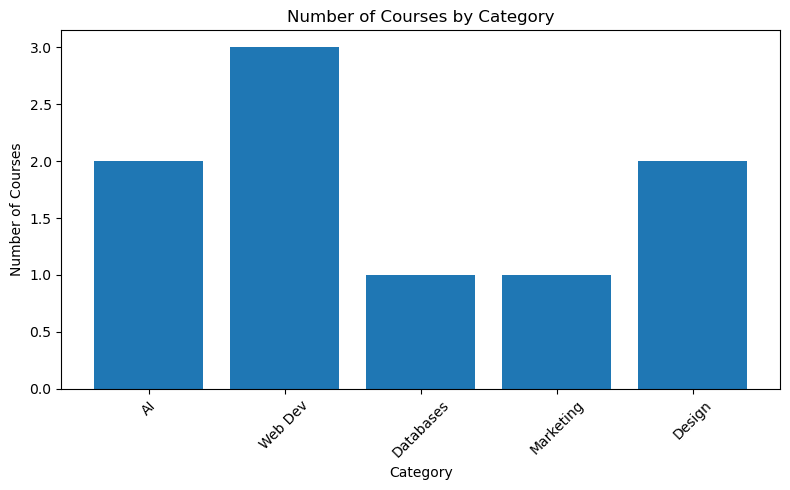

In [41]:

category_data = group_courses_by_category(db)

df_categories = pd.DataFrame(category_data)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_categories['category'], df_categories['count'])
plt.title("Number of Courses by Category")
plt.xlabel("Category")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Student Performance Analysis**

**Average grade per student**

In [4]:
avg_grades = get_avg_grade_per_student(db)
df_avg_grades = pd.DataFrame(avg_grades)
display(df_avg_grades)

,studentId,firstName,lastName,averageGrade
0,user9,James,Mason,95.83
1,user18,Austin,Delacruz,83.06
2,user2,George,Torres,81.52
3,user11,David,Simpson,75.76
4,user5,Eric,Hall,74.55
5,user3,Brittany,Smith,72.60
6,user23,Emily,Peterson,70.53


**Completion rate by course**

<Axes: title={'center': 'Course Completion Rates'}, xlabel='courseId'>

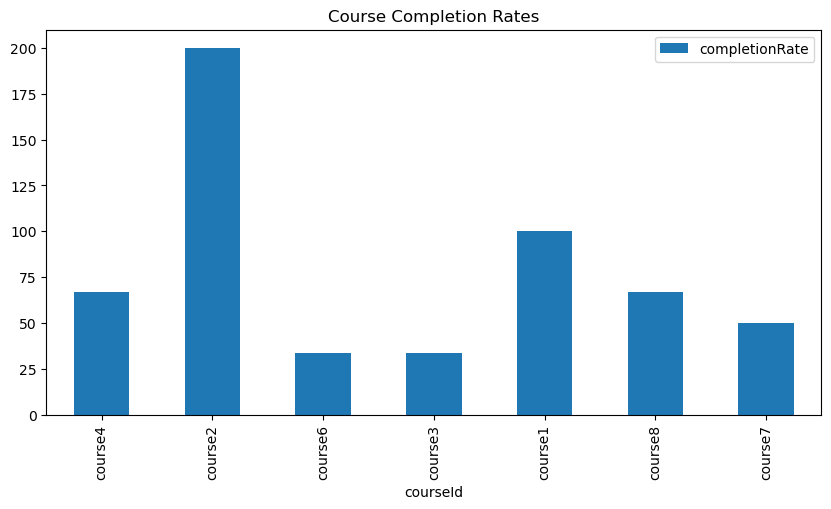

In [ ]:
df_completion.plot(x='courseId', y='completionRate', kind='bar', figsize=(10, 5), title='Course Completion Rates')


**Top-performing students**

In [14]:
top_students = get_top_performing_students(db, limit=5)
df_top_students = pd.DataFrame(top_students)
display(df_top_students)

,_id,submissionCount,averageGrade,name
0,user9,1,95.83,James Mason
1,user18,3,83.06,Austin Delacruz
2,user2,1,81.52,George Torres
3,user11,2,75.76,David Simpson
4,user5,1,74.55,Eric Hall


## **Instructor Analytics**


**Total students taught by each instructor**

In [10]:
total_students = get_total_students_per_instructor(db)
df_total_students = pd.DataFrame(total_students)
display(df_total_students)


,instructorId,instructorName,totalStudents
0,user29,Raymond Newman,5
1,user27,Frank Bowen,4
2,user26,Lisa Valdez,6
3,user28,Rachel Miles,3
4,user25,Billy Green,6


**Average course rating per instructor**


In [17]:
avg_ratings = get_avg_rating_per_instructor(db)
df_avg_ratings = pd.DataFrame(avg_ratings)
display(df_avg_ratings)


,instructorId,instructorName,avgRating
0,user26,Lisa Valdez,4.50
1,user27,Frank Bowen,2.50
2,user29,Raymond Newman,3.00
3,user25,Billy Green,3.83
4,user28,Rachel Miles,4.00



**Revenue generated per instructor**


,instructorId,instructorName,revenue
0,user29,Raymond Newman,364.62
1,user27,Frank Bowen,557.28
2,user26,Lisa Valdez,571.53
3,user28,Rachel Miles,472.62
4,user25,Billy Green,618.36


Index(['instructorId', 'instructorName', 'revenue'], dtype='object')


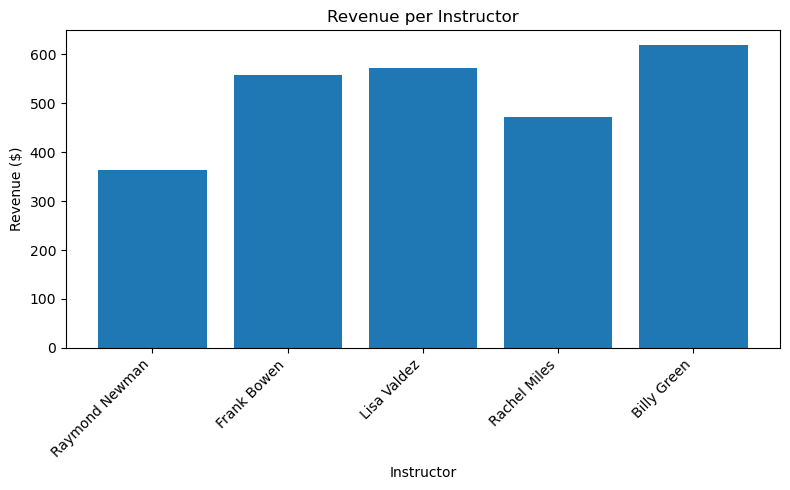

In [27]:
df_revenue = pd.DataFrame(get_revenue_per_instructor(db))
display(df_revenue)

# Check for correct column names before plotting
print(df_revenue.columns)

# Plot if 'instructorName' exists
if 'instructorName' in df_revenue.columns:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    plt.bar(df_revenue['instructorName'], df_revenue['revenue'])
    plt.xlabel("Instructor")
    plt.ylabel("Revenue ($)")
    plt.title("Revenue per Instructor")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'instructorName' not found.")


## **Advanced Analytics**


**Monthly enrollment trends**


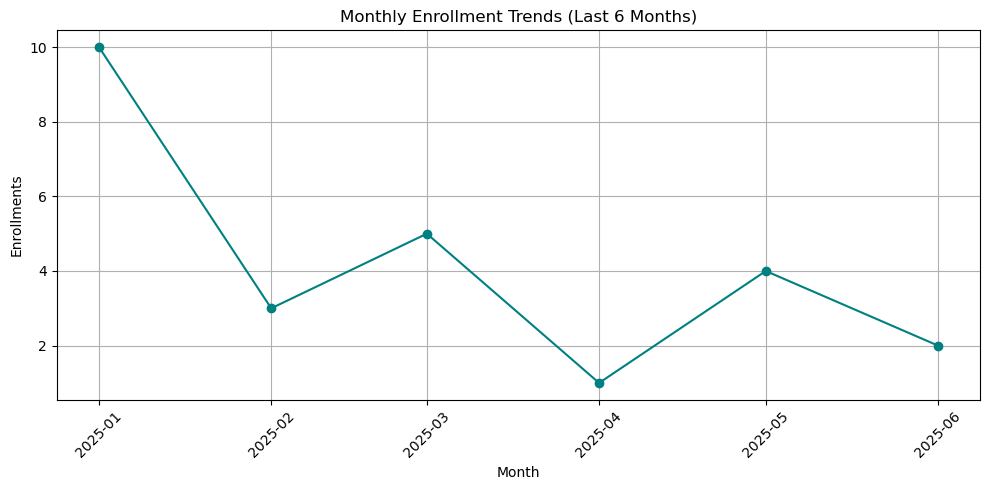

In [30]:
# Monthly enrollment trends for last 6 months
monthly_trends = get_monthly_enrollment_trends(db, 6)

df_trends = pd.DataFrame(monthly_trends)

df_trends["date"] = pd.to_datetime(df_trends["year"].astype(str) + "-" + df_trends["month"].astype(str) + "-01")

df_trends = df_trends.sort_values("date")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_trends["date"], df_trends["enrollments"], marker="o", linestyle='-', color='teal')

plt.title("Monthly Enrollment Trends (Last 6 Months)")
plt.xlabel("Month")
plt.ylabel("Enrollments")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Most popular course categories**


In [139]:
popular_categories = get_most_popular_categories(db)
print("\nMost Popular Course Categories:")
for cat in popular_categories:
    print(f"{cat['_id']}: {cat['enrollmentCount']} enrollments")



Most Popular Course Categories:
Web Dev: 12 enrollments
Design: 7 enrollments
AI: 6 enrollments


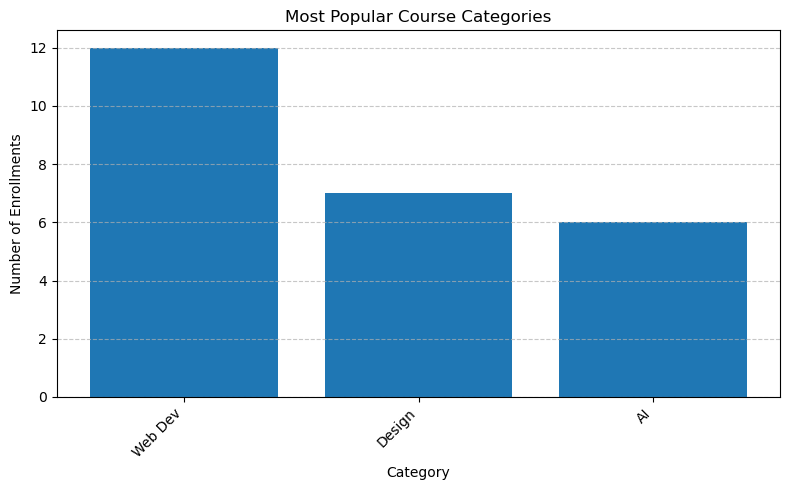

In [37]:
popular_categories = get_most_popular_categories(db)
df_categories = pd.DataFrame(popular_categories)

df_categories.rename(columns={"_id": "category"}, inplace=True)

df_categories = df_categories.sort_values(by="enrollmentCount", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_categories["category"], df_categories["enrollmentCount"])

plt.title("Most Popular Course Categories")
plt.xlabel("Category")
plt.ylabel("Number of Enrollments")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Student engagement metrics**

In [29]:
# Get the data
engagement_metrics = get_student_engagement_metrics(db)

# Convert to DataFrame
df_engagement = pd.DataFrame(engagement_metrics)

df_engagement


,assignmentsSubmitted,studentId,name,averageGrade
0,3,user16,Samantha Harris,NaN
1,1,user14,Susan Rodriguez,NaN
2,1,user13,Kendra Morton,NaN
3,1,user2,George Torres,81.52
4,1,user5,Eric Hall,74.55
5,1,user21,John Conner,NaN
6,3,user18,Austin Delacruz,83.06
7,1,user23,Emily Peterson,70.53
8,2,user9,James Mason,95.83
9,1,user19,Joseph Murray,NaN


# **Part 5: Indexing and Performance**

## **Task 5.1: Index Creation**

In [141]:
# 1. User email lookup (unique index on email)
db.users.create_index("email", unique=True)

'email_1'

In [142]:
# 2. Course search by title and category (compound text index for efficient text search)
db.courses.create_index([
    ("title", "text"),
    ("category", "text")
])

'title_text_category_text'

In [143]:
# 3. Assignment queries by due date (index on dueDate)
db.assignments.create_index("dueDate")

'dueDate_1'

In [144]:
# 4. Enrollment queries by student and course (compound index on studentId and courseId)
db.enrollments.create_index([("studentId", 1), ("courseId", 1)])

'studentId_1_courseId_1'

## **Task 5.2: Query Optimization**

**Analyze query performance using explain() method in PyMongo**

In [152]:
explain_res = analyze_query_performance(db, "courses", {"category": "Programming"})


{'executionStages': {'advanced': 0,
                     'direction': 'forward',
                     'docsExamined': 9,
                     'executionTimeMillisEstimate': 0,
                     'filter': {'category': {'$eq': 'Programming'}},
                     'isCached': False,
                     'isEOF': 1,
                     'nReturned': 0,
                     'needTime': 9,
                     'needYield': 0,
                     'restoreState': 0,
                     'saveState': 0,
                     'stage': 'COLLSCAN',
                     'works': 10},
 'executionSuccess': True,
 'executionTimeMillis': 1,
 'nReturned': 0,
 'totalDocsExamined': 9,
 'totalKeysExamined': 0}


**Optimize at least 3 slow queries**

**Query Before index**

In [ ]:
# 1. Course by category
q1_before = time_query(db, "courses", {"category": "Programming"}, label="Course by Category")

# 2. Enrollment by student and course
q2_before = time_query(db, "enrollments", {"studentId": "student123", "courseId": "course1"}, label="Enrollment Lookup")

# 3. Assignment due next week
now = datetime.utcnow()
next_week = now + timedelta(days=7)
q3_before = time_query(db, "assignments", {"dueDate": {"$gte": now, "$lte": next_week}}, label="Upcoming Assignments")

In [168]:
#Creating Index
db.courses.create_index([("category", 1)])
db.enrollments.create_index([("studentId", 1), ("courseId", 1)])
db.assignments.create_index([("dueDate", 1)])


'dueDate_1'

In [169]:
# After Indexing
q1_after = time_query(db, "courses", {"category": "Programming"}, label="Course by Category")
q2_after = time_query(db, "enrollments", {"studentId": "student123", "courseId": "course1"}, label="Enrollment Lookup")
q3_after = time_query(db, "assignments", {"dueDate": {"$gte": now, "$lte": next_week}}, label="Upcoming Assignments")


**Document the performance improvements using Python timing functions**

In [170]:
print_comparison(q1_before, q1_after)
print_comparison(q2_before, q2_after)
print_comparison(q3_before, q3_after)



📊 Course by Category
  - Before Index: 5.25 ms
  - After Index:  0.93 ms
  - Improvement:  4.32 ms

📊 Enrollment Lookup
  - Before Index: 1.02 ms
  - After Index:  0.57 ms
  - Improvement:  0.45 ms

📊 Upcoming Assignments
  - Before Index: 0.53 ms
  - After Index:  0.54 ms
  - Improvement:  -0.01 ms
